In [286]:
## IMPORT LIBRARY ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats, integrate

In [288]:
## FUNGSI FUNGSI DAN VARIABLE DATA ##
head = ["id","Daerah","SumbuUtama","SumbuKecil","Keunikan","AreaBulatan","Diameter","KadarAir","Keliling","Bulatan","Ransum","Kelas"]

df = pd.read_csv("Gandum.csv", names=head)

def mean(df, colname, from_row_idx, to_row_idx):
    lendata = to_row_idx - from_row_idx + 1
    sum = 0
    for j in range (from_row_idx, to_row_idx+1):
        sum+=float(df.loc[j,colname])
    return sum/lendata

def median(df, colname, from_row_idx, to_row_idx):
    listdata = list(df.loc[from_row_idx:to_row_idx, colname])
    listdata.sort()
    middle_idx = len(listdata)//2
    if (len(listdata)%2==0):
        return (listdata[middle_idx]+listdata[middle_idx-1])/2
    else:
        return listdata[middle_idx]

def modus(df, colname, from_row_idx, to_row_idx):
    listdata = list(df.loc[from_row_idx:to_row_idx, colname])
    listdata.sort()
    count_max = 0
    current_data = listdata[0]
    mode_data = []
    idx_data = 0
    j=0
    while (j<len(listdata)):
        count_temp = 0
        while (listdata[j]==current_data and j<len(listdata)):
            count_temp += 1
            j+=1
        
        if (count_temp > count_max):
            mode_data = []
            count_max = count_temp
            mode_data.append(current_data)
        elif (count_temp == count_max):
            mode_data.append(current_data)
        
        current_data = listdata[j]
        j+=1
        
            
    return mode_data

def variansi(df, colname, from_row_idx, to_row_idx):
    sum_pembilang = 0
    mean_data = mean(df,colname,from_row_idx,to_row_idx)
    for j in range (from_row_idx, to_row_idx+1):
        sum_pembilang += (float(df.loc[j,colname])-mean_data)**2

    return sum_pembilang/(to_row_idx - from_row_idx + 1)

def standarDeviasi(df, colname, from_row_idx, to_row_idx):
    return math.sqrt(variansi(df, colname, from_row_idx, to_row_idx))

def minData(df, colname, from_row_idx,to_row_idx):
    listdata = list(df.loc[from_row_idx:to_row_idx, colname])
    return min(listdata)

def maxData(df, colname, from_row_idx,to_row_idx):
    listdata = list(df.loc[from_row_idx:to_row_idx, colname])
    return max(listdata)

def kuartil(df, colname, from_row_idx,to_row_idx):
    df = df.sort_values(by=[colname]).reset_index(drop=True)
    listdata = list(df.loc[from_row_idx:to_row_idx, colname])
    lendata = len(listdata)
    quartile = []
    middle_idx = lendata//2
    quartile += [median(df,colname,from_row_idx,middle_idx-1)]
    if (lendata%2 == 0): 
        quartile += [median(df,colname,from_row_idx,to_row_idx)]
        quartile += [median(df,colname,middle_idx,to_row_idx)]
    else:
        quartile += [listdata[middle_idx]]
        quartile += [median(df,colname,middle_idx+1,to_row_idx)]

    return quartile

def skewness(df, colname, from_row_idx, to_row_idx):
    mean_data = mean(df, colname, from_row_idx, to_row_idx)
    std_dev = standarDeviasi(df, colname, from_row_idx, to_row_idx)
    sum_pembilang = 0
    for j in range (from_row_idx,to_row_idx):
        sum_pembilang += (float(df.loc[j,colname]) - mean_data)**3
    
    return (sum_pembilang/(to_row_idx-from_row_idx+1))/(std_dev**3)

def kurtosis(df, colname, from_row_idx, to_row_idx):
    mean_data = mean(df, colname, from_row_idx, to_row_idx)
    std_dev = standarDeviasi(df, colname, from_row_idx, to_row_idx)
    sum_pembilang = 0
    for j in range (from_row_idx,to_row_idx):
        sum_pembilang += (float(df.loc[j,colname]) - mean_data)**4
    
    return (sum_pembilang/(to_row_idx-from_row_idx+1))/(std_dev**4)

def normalityTest(df, colname, from_row_idx, to_row_idx):
    listdata = list(df.loc[from_row_idx:to_row_idx,colname])
    test = stats.shapiro(listdata)
    return test.pvalue

def integrand (x):
    return 1.0/np.sqrt(2*np.pi) * np.exp((-x**2)/2.0)

def normDensity(x):
    return format(integrate.quad(integrand,-(np.inf),x)[0],".4f")



In [290]:
## SOAL 1 ##
for col in df:
    if (col!="id" and col!="Kelas"):
        print("Deskripsi Statistika Data: "+ col)
        print("\tMean: "+str(mean(df,col,0,len(df)-1)))
        print("\tMedian: "+ str(median(df,col,0,len(df)-1)))
        print("\tModus: ", end='')
        mode = modus(df,col,0,len(df)-1)
        for i in range (len(mode)):
            if (i==len(mode)-1):
                print(str(mode[i]))
            else:
                print(str(mode[i]), end=', ')
        print("\tVariansi: "+ str(variansi(df, col,0,len(df)-1)))
        print("\tStandar Deviasi: "+ str(standarDeviasi(df, col,0,len(df)-1)))
        maxcol = maxData(df, col,0,len(df)-1)
        mincol = minData(df, col,0,len(df)-1)
        print("\tMax: "+str(maxcol))
        print("\tMin: "+str(mincol))
        print("\tRange: "+str(maxcol-mincol))

        quartile = kuartil(df,col,0,len(df)-1)
        for i in range (3):
            print("\tQ"+str(i+1)+": ", quartile[i])

        print("\tIQR: "+str(quartile[2]-quartile[0]))

        print("\tSkewness: "+str(skewness(df,col,0,len(df)-1)))
        print("\tKurtosis: "+str(kurtosis(df,col,0,len(df)-1)))
        
        #ENDFOR
        print("\n")


Deskripsi Statistika Data: Daerah
	Mean: 4801.246
	Median: 4735.0
	Modus: 3992, 4881, 5642, 6083
	Variansi: 971030.1134840002
	Standar Deviasi: 985.4086022985593
	Max: 7453
	Min: 2522
	Range: 4931
	Q1:  4042.5
	Q2:  4735.0
	Q3:  5496.0
	IQR: 1453.5
	Skewness: 0.2434422514804131
	Kurtosis: 2.5490486951008573


Deskripsi Statistika Data: SumbuUtama
	Mean: 116.04517136778003
	Median: 115.40513995
	Modus: 74.13311404
	Variansi: 333.5859030802153
	Standar Deviasi: 18.264334181136068
	Max: 227.9285827
	Min: 74.13311404
	Range: 153.79546865999998
	Q1:  104.06339274999999
	Q2:  115.40513995
	Q3:  129.05596105
	IQR: 24.992568300000016
	Skewness: 0.7608636505912948
	Kurtosis: 7.2738613851284075


Deskripsi Statistika Data: SumbuKecil
	Mean: 53.71524598896002
	Median: 53.731198774999996
	Modus: 39.90651744
	Variansi: 16.540502340959183
	Standar Deviasi: 4.067001640147097
	Max: 68.97769987
	Min: 39.90651744
	Range: 29.071182429999993
	Q1:  51.192399645
	Q2:  53.731198774999996
	Q3:  56.32601907500

<ipython-input-299-5eb5fedcd105>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


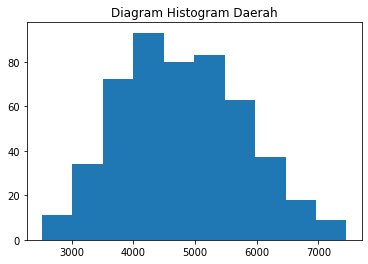

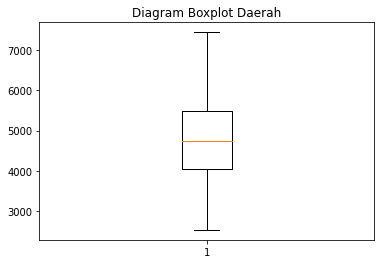

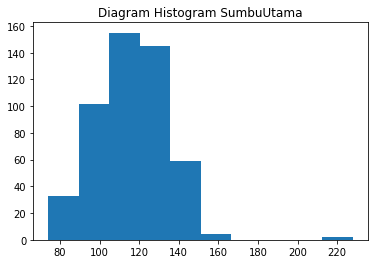

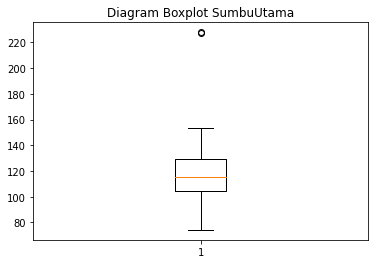

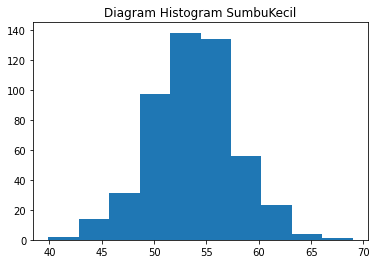

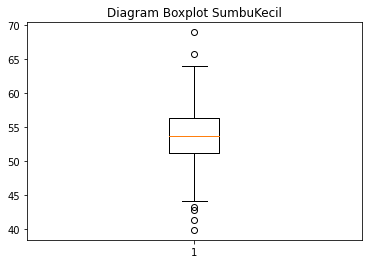

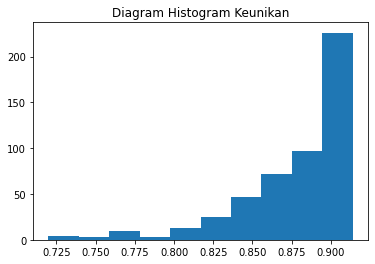

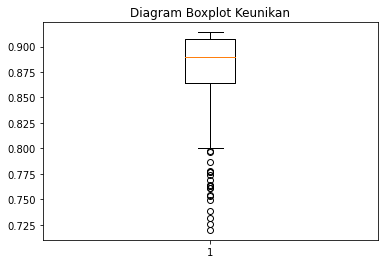

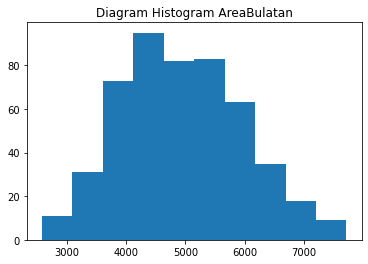

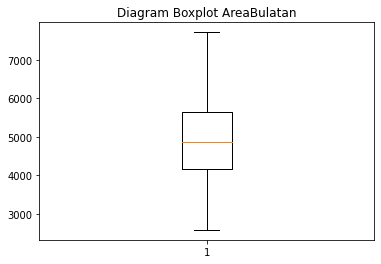

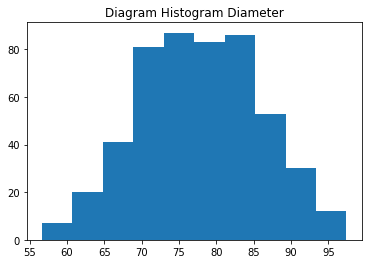

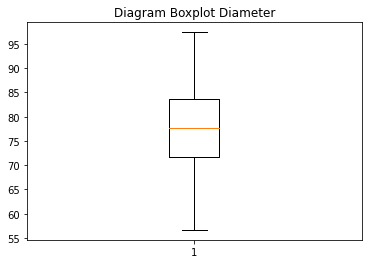

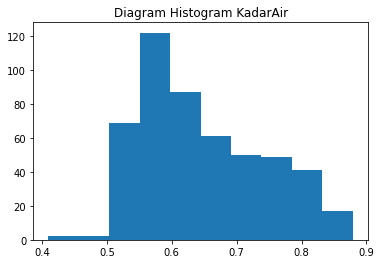

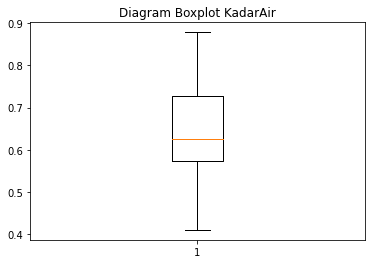

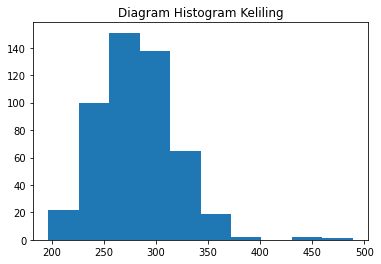

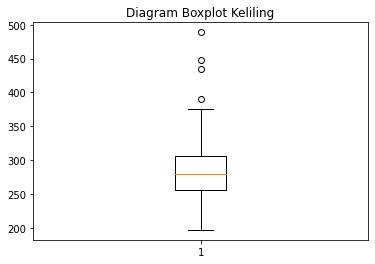

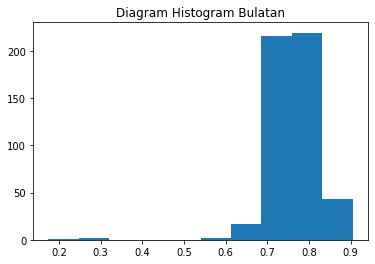

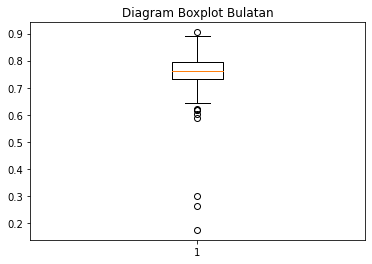

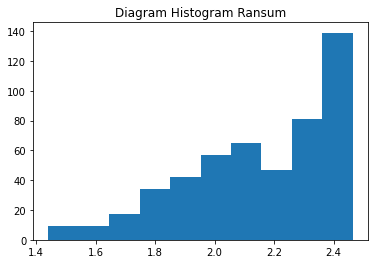

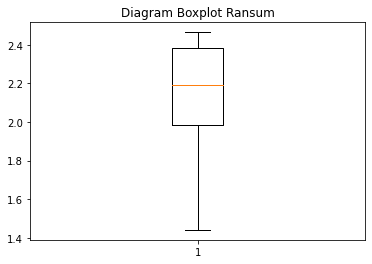

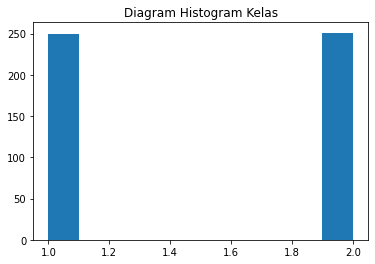

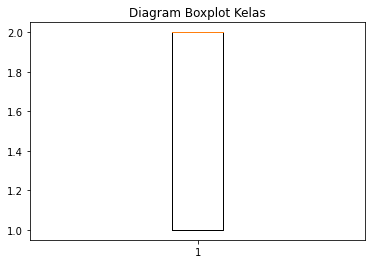

In [299]:
## SOAL 2 ##
for i in range (len(head)):
    if (i != 0 and i != 11):
        tabel = list(df.loc[0:len(df)-1,head[i]])
        plt.figure()
        plt.title("Diagram Histogram " + head[i])
        plt.hist(tabel)
        plt.figure()
        plt.title("Diagram Boxplot " + head[i])
        plt.boxplot(tabel)

In [ ]:
## SOAL 3 ##
# use Anderson-romance normality test scipy
pval = normalityTest(df, "Daerah", 0, len(df)-1)

if (pval<0.05):
    print("Not a normal distribution")
else:
    print("Normal distributed")

In [ ]:
## SOAL 4 ##
##################### DATA TEST #####################

#parameter array 
# test_value_using_mean = [[column_name, H1 testing, H0 value, from_row_idx, to_row_idx]]

lendata = len(df)
test_value_using_mean = [["Daerah",">",4700,0,lendata-1],["SumbuUtama","!=",116,0,lendata-1],["SumbuKecil","!=",50,0,19]]

#test_value_using_p = [[column_name, operator 1st req, 1st req value, H1 testing, H0 value]]

test_value_using_p = [["Diameter",">",85,"!=",0.15], ["Keliling","<",100,"<",0.05]]

######################################################

for data in test_value_using_mean:
    #Tentukan H0
    h0 = data[2]

    #H1
    h1 = data[1]

    #significance value
    alpha = 0.05

    if (h1=="!="):
        alpha /= 2
    
    #critical value
    cvalue = 1.645

    if (h1=="!="):
        cvalue = 1.96

    #p value data
    pval = normalityTest(df, data[0],data[3],data[4])

    #Keputusan
    mean_data = mean(df, data[0], data[3], data[4])
    std = standarDeviasi(df, data[0], data[3], data[4])
    z = (mean_data-data[2])/(std/math.sqrt(data[4]-data[3]+1))

    print("Data "+data[0]+" dengan H1 "+h1+" "+str(h0), end=' : ')
    isTolak = False
    if (h1 == ">"):
        if (z > cvalue):
            isTolak = True
    elif (h1 == "<"):
        if (z < cvalue):
            isTolak = True
    elif (h1 =="!="):
        if (z > cvalue or z < cvalue):
            isTolak = True
    #else:
        #isTolak = False

    if (not isTolak):
        if (pval < alpha):
            isTolak = True
        #else:
            #isTolak = False
    
    if (isTolak):
        print("H0 ditolak")
    else:
        print("H0 diterima")


for data in test_value_using_p:
    #buat df baru
    newdf = df.sort_values(by=[data[0]]).reset_index(drop=True)
    start_idx = 0
    if (data[1]==">"):
        while (not df.loc[start_idx,data[0]]>data[2]):
            start_idx+=1
        
    #Tentukan H0
    h0 = data[4]

    #H1
    h1 = data[3]

    #significance value
    alpha = 0.05

    if (h1=="!="):
        alpha /= 2
    
    #critical value
    cvalue = 1.645

    if (h1=="!="):
        cvalue = 1.96

    #p value data
    pval = normalityTest(df, data[0],start_idx,len(df)-1)

    #Keputusan
    pembilang = (len(newdf)/len(df)) - h0
    penyebut = np.sqrt(h0*(1-h0)/len(df))
    val = pembilang/penyebut

    z = float(normDensity(val))

    print("Data "+data[0]+" dengan H1 "+h1+" "+str(h0), end=' : ')
    isTolak = False
    if (h1 == ">"):
        if (z > cvalue):
            isTolak = True
    elif (h1== "<"):
        if (z < cvalue):
            isTolak = True
    elif (h1 =="!="):
        if (z > cvalue or z < cvalue):
            isTolak = True
    #else:
        #isTolak = False

    if (not isTolak):
        if (pval < alpha):
            isTolak = True
        #else:
            #isTolak = False
    

    if (isTolak):
        print("H0 ditolak")
    else:
        print("H0 diterima")

Nilai korelasi Antara Variable Daerah dengan Kelas :  -0.6027466517416693
Jenis korelasi Antara Variable Daerah dengan Kelas :  Kuat - Negatif 

Nilai korelasi Antara Variable SumbuUtama dengan Kelas :  -0.7130906104204631
Jenis korelasi Antara Variable SumbuUtama dengan Kelas :  Kuat - Negatif 

Nilai korelasi Antara Variable SumbuKecil dengan Kelas :  -0.1529751733553512
Jenis korelasi Antara Variable SumbuKecil dengan Kelas :  Sangat Lemah - Negatif 

Nilai korelasi Antara Variable Keunikan dengan Kelas :  -0.7304563686511976
Jenis korelasi Antara Variable Keunikan dengan Kelas :  Kuat - Negatif 

Nilai korelasi Antara Variable AreaBulatan dengan Kelas :  -0.6073125434153784
Jenis korelasi Antara Variable AreaBulatan dengan Kelas :  Kuat - Negatif 

Nilai korelasi Antara Variable Diameter dengan Kelas :  -0.602535689661885
Jenis korelasi Antara Variable Diameter dengan Kelas :  Kuat - Negatif 

Nilai korelasi Antara Variable KadarAir dengan Kelas :  0.13434422605727742
Jenis korelas

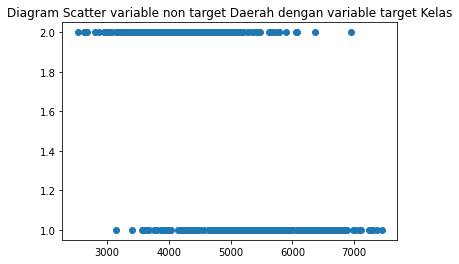

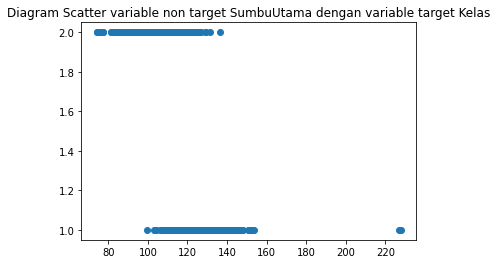

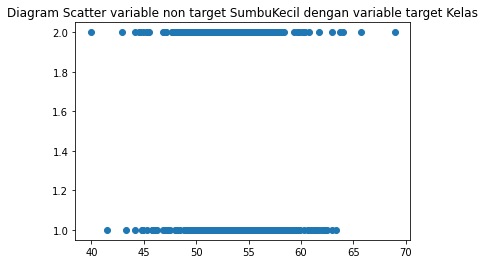

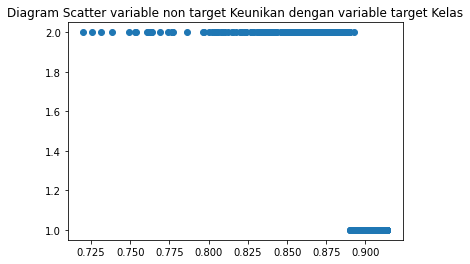

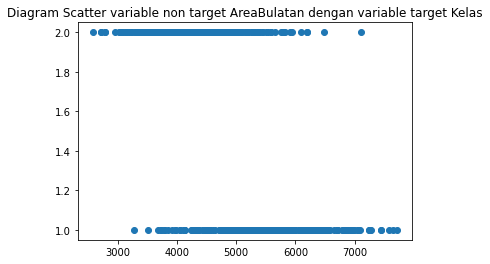

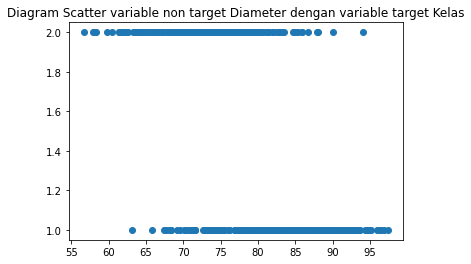

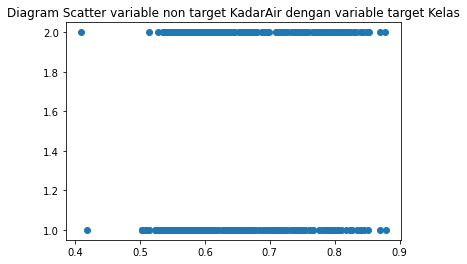

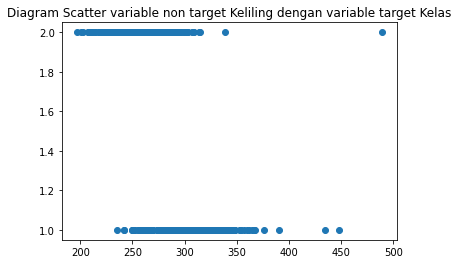

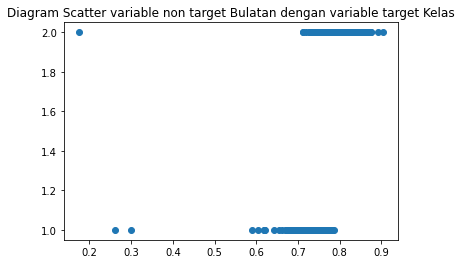

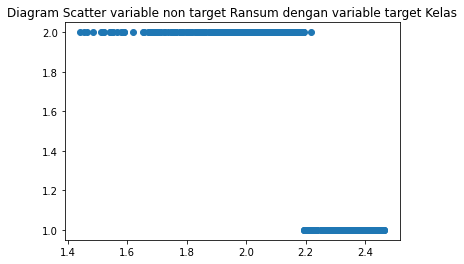

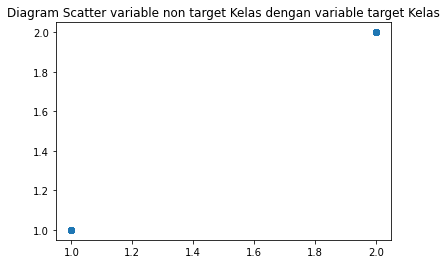

<Figure size 432x288 with 0 Axes>

In [297]:
## SOAL 6 ##
def pearsonCorrelation(nonTargetVar,idxNonTarget):
    nonTargetMean = mean(df,nonTargetVar,0,len(df)-1)
    targetMean = mean(df,"Kelas",0,len(df)-1)
    intCoefCorr = 0
    divCoefCorr1 = 0
    divCoefCorr2 = 0
    for i in range (len(list(df.loc[0:len(df)-1,nonTargetVar]))):
        intCoefCorr += (tabel[idxNonTarget][i] - nonTargetMean) * (tabel[11][i] - targetMean)
        divCoefCorr1 += (tabel[idxNonTarget][i] - nonTargetMean) ** 2
        divCoefCorr2 += (tabel[11][i] - targetMean) ** 2
    return (intCoefCorr / (math.sqrt(divCoefCorr1 * divCoefCorr2)))

tabel = [0 for i in range(len(head))]
for i in range(len(tabel)):
    tabel[i] = list(df.loc[0:len(df)-1,head[i]])

nilaiKorelasi = [0 for i in range(len(head))]
jenisKorelasi = ["-" for i in range(len(head))]
for i in range(len(tabel)):
    if (i != 0 and i != 11):
        nilaiKorelasi[i] = pearsonCorrelation(head[i],i)
        if (nilaiKorelasi[i] >= 0.8):
            jenisKorelasi[i] = "Sangat Kuat - Positif"
        elif (nilaiKorelasi[i] >= 0.6):
            jenisKorelasi[i] = "Kuat - Positif"
        elif (nilaiKorelasi[i] >= 0.4):
            jenisKorelasi[i] = "Sedang - Positif"
        elif (nilaiKorelasi[i] >= 0.2):
            jenisKorelasi[i] = "Lemah - Positif"
        elif (nilaiKorelasi[i] >= 0):
            jenisKorelasi[i] = "Sangat Lemah - Positif"
        elif (nilaiKorelasi[i] > -0.2):
            jenisKorelasi[i] = "Sangat Lemah - Negatif"
        elif (nilaiKorelasi[i] > -0.4):
            jenisKorelasi[i] = "Lemah - Negatif"
        elif (nilaiKorelasi[i] > -0.6):
            jenisKorelasi[i] = "Sedang - Negatif"
        elif (nilaiKorelasi[i] > -0.8):
            jenisKorelasi[i] = "Kuat - Negatif"
        else:
            jenisKorelasi[i] = "Sangat Kuat - Negatif"
        print("Nilai korelasi Antara Variable", head[i], "dengan", head[11], ": " , str(nilaiKorelasi[i]))
        print("Jenis korelasi Antara Variable", head[i], "dengan", head[11], ": " , str(jenisKorelasi[i]), "\n")

for i in range (len(head)):
    if i != 0:
        tabel = list(df.loc[0:len(df)-1,head[i]])
        tabelTarget = list(df.loc[0:len(df)-1,head[11]])
        plt.title("Diagram Scatter variable non target " + head[i] + " dengan variable target Kelas" )
        plt.scatter(tabel,tabelTarget)
        plt.figure()

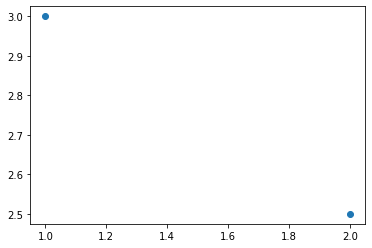

In [298]:
a = [1,2]
b = [3,2.5]
plt.scatter(a,b)
